In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import tensorflow as tf
import numpy as np
import random
import pandas as pd
import csv
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import os

path = "/content/drive/My Drive"

os.chdir(path)
os.listdir(path)

annotations = pd.read_csv('/content/drive/My Drive/train_annotations.csv')
#annotations = pd.read_csv('train_annotations.csv')
df = pd.DataFrame({'file_name': [],'width': [],'height': [],'category':[]})

['057_0001.png', '057_0002.png', '057_0003_j.png', '057_1_0001.png', '057_1_0002.png', '057_1_0003_1_j.png']
{'0': 118, '1': 40, '2': 80, '3': 260, '4': 98, '5': 194, '6': 78, '7': 152, '8': 8, '9': 2, '10': 70, '11': 138, '12': 96, '13': 36, '14': 128, '15': 22, '16': 142, '17': 130, '18': 8, '19': 4, '20': 18, '21': 12, '22': 18, '23': 14, '24': 100, '25': 2, '26': 126, '27': 28, '28': 446, '29': 44, '30': 150, '31': 42, '32': 14, '33': 4, '34': 26, '35': 156, '36': 40, '37': 58, '38': 30, '39': 34, '40': 32, '41': 18, '42': 32, '43': 82, '44': 30, '45': 24, '46': 18, '47': 12, '48': 10, '49': 42, '50': 56, '51': 8, '52': 36, '53': 2, '54': 324, '55': 162, '56': 110, '57': 6}
total number 4170
average should be 71.89655172413794


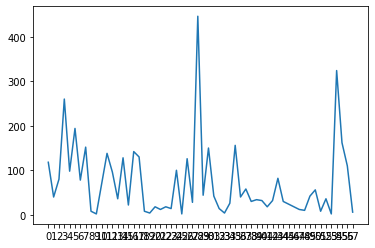

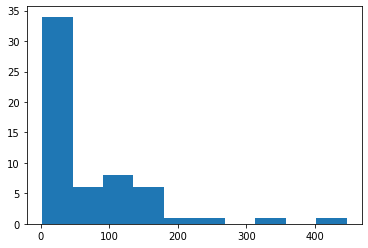

In [4]:
label = []
label_image_d = {'0':[], '1':[], '2':[], '3':[], '4':[], '5':[], '6':[], '7':[], '8':[], '9':[], '10':[],
                 '11':[], '12':[], '13':[], '14':[], '15':[], '16':[], '17':[], '18':[], '19':[], '20':[],
                 '21':[], '22':[], '23':[], '24':[], '25':[], '26':[], '27':[], '28':[], '29':[], '30':[],
                 '31':[], '32':[], '33':[], '34':[], '35':[], '36':[], '37':[], '38':[], '39':[], '40':[],
                 '41':[], '42':[], '43':[], '44':[], '45':[], '46':[], '47':[], '48':[], '49':[], '50':[],
                 '51':[], '52':[], '53':[], '54':[], '55':[], '56':[], '57':[]}
d = {}

with open('/content/drive/My Drive/TsignRecgTrain4170Annotation.txt','r') as f:
#with open('TsignRecgTrain4170Annotation.txt','r') as f:
  for i in f:
    i = i.strip().split(';')
    label.append(i[-2])
    filename = i[0]
    d[i[-2]] = d.get(i[-2],0) + 1
    label_image_d[i[-2]].append(filename)
f.close()

print(label_image_d['57']) # label:image_filename pairs
print(d) # label:number of images of this labal

print('total number', len(label))
print('average should be', len(label)/58)

# for k,v in d.items():
#   if v < average:
#     print(k)

labels = list(d.keys())
frequency = list(d.values())
plt.plot(labels, frequency)
plt.show()

plt.hist(frequency)
plt.show()

In [5]:
ideal_average = (6*len(label))//58
dic = {}
print(ideal_average)
for k,v in d.items():
  print('label:',k,'already have:', d[str(k)], 'should add:', ideal_average-v)
  dic[k] = ideal_average-v

431
label: 0 already have: 118 should add: 313
label: 1 already have: 40 should add: 391
label: 2 already have: 80 should add: 351
label: 3 already have: 260 should add: 171
label: 4 already have: 98 should add: 333
label: 5 already have: 194 should add: 237
label: 6 already have: 78 should add: 353
label: 7 already have: 152 should add: 279
label: 8 already have: 8 should add: 423
label: 9 already have: 2 should add: 429
label: 10 already have: 70 should add: 361
label: 11 already have: 138 should add: 293
label: 12 already have: 96 should add: 335
label: 13 already have: 36 should add: 395
label: 14 already have: 128 should add: 303
label: 15 already have: 22 should add: 409
label: 16 already have: 142 should add: 289
label: 17 already have: 130 should add: 301
label: 18 already have: 8 should add: 423
label: 19 already have: 4 should add: 427
label: 20 already have: 18 should add: 413
label: 21 already have: 12 should add: 419
label: 22 already have: 18 should add: 413
label: 23 alr

In [0]:
def one_image_to_array(filename):
    img = tf.io.read_file('/content/drive/My Drive/ML/ML project data/tsrd-train/'+filename)
    return np.array(tf.image.decode_png(img, channels=3))

In [0]:
def output_saturation(image, outname, original_category):
    global df
    saturation_degree = random.uniform(0.0001,2.5)
    augmented = tf.image.adjust_saturation(image, saturation_degree)
    output_image = tf.cast(augmented, dtype=tf.uint8)
    out = tf.image.encode_png(output_image)
    with tf.io.gfile.GFile(outname, 'wb') as file:
        file.write(out.numpy())
    new_row = {'file_name':outname, 'width':augmented.shape[0], 'height':augmented.shape[1], 'category':original_category}
    df = df.append(new_row, ignore_index=True)

In [0]:
def output_flipped(image, outname, original_category):
    global df
    augmented = tf.image.flip_left_right(image)
    output_image = tf.cast(augmented, dtype=tf.uint8)
    out = tf.image.encode_png(output_image)
    with tf.io.gfile.GFile(outname, 'wb') as file:
        file.write(out.numpy())
    new_row = {'file_name':outname, 'width':augmented.shape[0], 'height':augmented.shape[1], 'category':original_category}
    df = df.append(new_row, ignore_index=True)

In [0]:
def output_brightness(image, outname, original_category):
    global df
    brightness_degree = random.uniform(0.0001,0.4)
    augmented = tf.image.adjust_brightness(image, brightness_degree)
    output_image = tf.cast(augmented, dtype=tf.uint8)
    out = tf.image.encode_png(output_image)
    with tf.io.gfile.GFile(outname, 'wb') as file:
        file.write(out.numpy())
    new_row = {'file_name':outname, 'width':augmented.shape[0], 'height':augmented.shape[1], 'category':original_category}
    df = df.append(new_row, ignore_index=True)

In [0]:
def output_rotation(image, outname, original_category):
    global df
    augmented = tf.keras.preprocessing.image.random_rotation(image, 30, row_axis=0, col_axis=1, channel_axis=2)
    output_image = tf.cast(augmented, dtype=tf.uint8)
    out = tf.image.encode_png(output_image)
    with tf.io.gfile.GFile(outname, 'wb') as file:
        file.write(out.numpy())
    new_row = {'file_name':outname, 'width':augmented.shape[0], 'height':augmented.shape[1], 'category':original_category}
    df = df.append(new_row, ignore_index=True)

In [0]:
def output_shift(image, outname, original_category):
    global df
    shift_degree1 = random.uniform(0.01, 0.2)
    shift_degree2 = random.uniform(0.01, 0.2)
    augmented = tf.keras.preprocessing.image.random_shift(image, shift_degree1, shift_degree2, row_axis=0, col_axis=1, channel_axis=2)
    output_image = tf.cast(augmented, dtype=tf.uint8)
    out = tf.image.encode_png(output_image)
    with tf.io.gfile.GFile(outname, 'wb') as file:
        file.write(out.numpy())
    new_row = {'file_name':outname, 'width':augmented.shape[0], 'height':augmented.shape[1], 'category':original_category}
    df = df.append(new_row, ignore_index=True)

In [0]:
def output_crop(image, outname, original_category):
    global df
    crop_degree = random.uniform(0.75,1)
    augmented = tf.image.central_crop(image, central_fraction=crop_degree)
    output_image = tf.cast(augmented, dtype=tf.uint8)
    out = tf.image.encode_png(output_image)
    with tf.io.gfile.GFile(outname, 'wb') as file:
        file.write(out.numpy())
    new_row = {'file_name':outname, 'width':augmented.shape[0], 'height':augmented.shape[1], 'category':original_category}
    df = df.append(new_row, ignore_index=True)

In [0]:
def augment_one_image(image_filename, original_category, i):
    image_array = one_image_to_array(image_filename)
    aumentation_method = random.choice([1,2,3,4,5])
    if aumentation_method == 1:
        output_saturation(image_array, '/content/drive/My Drive/ML/augmented data 24K/'+'s'+str(i)+'_'+image_filename, original_category)
    # output_flipped(image_array, '/content/drive/My Drive/ML/augmented data 24K/'+'f'+str(i)+'_'+image_filename, original_category)
    elif aumentation_method == 2:
        output_brightness(image_array, '/content/drive/My Drive/ML/augmented data 24K/'+'b'+str(i)+'_'+image_filename, original_category)
    elif aumentation_method == 3:
        output_rotation(image_array, '/content/drive/My Drive/ML/augmented data 24K/'+'r'+str(i)+'_'+image_filename, original_category)
    elif aumentation_method == 4:
        output_shift(image_array, '/content/drive/My Drive/ML/augmented data 24K/'+'sh'+str(i)+'_'+image_filename, original_category)
    else:
        output_crop(image_array, '/content/drive/My Drive/ML/augmented data 24K/'+'c'+str(i)+'_'+image_filename, original_category)

In [0]:
def augment_one_category(original_category, n):
    category_image_filename_list = list(label_image_d[original_category])
    original_number_images = d[original_category]
    for i in range(n):
      image_filename = category_image_filename_list[i % original_number_images]
      augment_one_image(image_filename, original_category, i)

In [0]:
def copy_one_image(image_filename, outname, original_category):
    global df
    image_array = one_image_to_array(image_filename)
    print(image_filename)
    # print(image_array.shape)
    print(annotations.loc[annotations['file_name']==image_filename])
    x1 = int(annotations.loc[annotations['file_name']==image_filename, 'x1'].item())
    y1 = int(annotations.loc[annotations['file_name']==image_filename, 'y1'].item())
    x2 = int(annotations.loc[annotations['file_name']==image_filename, 'x2'].item())
    y2 = int(annotations.loc[annotations['file_name']==image_filename, 'y2'].item())
    # print(x1,x2,y1,y2)   
    copied = tf.image.crop_to_bounding_box(image_array, y1, x1, y2-y1, x2-x1)
    output_image = tf.cast(copied, dtype=tf.uint8)
    out = tf.image.encode_png(output_image)
    with tf.io.gfile.GFile(outname, 'wb') as file:
        file.write(out.numpy())
    new_row = {'file_name':outname, 'width':copied.shape[0], 'height':copied.shape[1], 'category':original_category}
    df = df.append(new_row, ignore_index=True)

In [0]:
def undersample_one_category(original_category, n):
    category_image_filename_list = list(label_image_d[original_category])
    sampled_image_filenames = random.sample(category_image_filename_list, n)
    for image_filename in sampled_image_filenames:
        copy_one_image(image_filename, '/content/drive/My Drive/ML/augmented data 24K/'+'c_'+image_filename, original_category)

In [0]:
def copy_one_category(original_category):
    category_image_filename_list = list(label_image_d[original_category])
    for image_filename in category_image_filename_list:
        outname = '/content/drive/My Drive/ML/augmented data 24K/'+'c_'+image_filename
        copy_one_image(image_filename, outname, original_category)

In [0]:
def augment_all():
    for category in list(label_image_d.keys()):
        if dic[category] >= 0:
            augment_one_category(category, dic[category])
            copy_one_category(category)
        else:
            undersample_one_category(category, ideal_average)
    df.to_csv('/content/drive/My Drive/ML/augmented data 24K/'+'super_aug_annotations.csv', index = False)

In [0]:
# augment_one_category('9', 429)

In [22]:
augment_all() #finish data cleaning, dara augmentation and deal with the inbalanced data

Streaming output truncated to the last 5000 lines.
3796  028_1_0175.png    154     139  28  23  126  119        28
028_1_0034.png
           file_name  width  height  x1  y1   x2   y2  category
3657  028_1_0034.png    235     208  42  38  189  184        28
028_0051.png
         file_name  width  height  x1  y1   x2   y2  category
1589  028_0051.png    204     201  42  33  162  169        28
028_0164.png
         file_name  width  height  x1  y1   x2   y2  category
1700  028_0164.png    210     206  34  27  186  178        28
028_1_0032.png
           file_name  width  height  x1  y1   x2   y2  category
3655  028_1_0032.png    169     155  33  27  136  129        28
028_0145.png
         file_name  width  height  x1  y1   x2   y2  category
1681  028_0145.png    165     144  40  27  126  116        28
028_0107.png
         file_name  width  height  x1  y1   x2  y2  category
1643  028_0107.png    125     114  21  15  102  99        28
028_1_0180.png
           file_name  width  height  x

In [0]:
df.to_csv('super_aug_annotations.csv', index = False)

In [0]:
df.to_csv('/content/drive/My Drive/'+'super_aug_annotations.csv', index = False)

In [0]:
df.to_csv('/content/drive/My Drive/ML/augmented data 24K'+'super_aug_annotations.csv', index = False)

In [28]:
print(df)

                                               file_name  ...  category
0      /content/drive/My Drive/ML/augmented data 24K/...  ...         9
1      /content/drive/My Drive/ML/augmented data 24K/...  ...         9
2      /content/drive/My Drive/ML/augmented data 24K/...  ...         9
3      /content/drive/My Drive/ML/augmented data 24K/...  ...         9
4      /content/drive/My Drive/ML/augmented data 24K/...  ...         9
...                                                  ...  ...       ...
25422  /content/drive/My Drive/ML/augmented data 24K/...  ...        57
25423  /content/drive/My Drive/ML/augmented data 24K/...  ...        57
25424  /content/drive/My Drive/ML/augmented data 24K/...  ...        57
25425  /content/drive/My Drive/ML/augmented data 24K/...  ...        57
25426  /content/drive/My Drive/ML/augmented data 24K/...  ...        57

[25427 rows x 4 columns]


In [0]:
df.to_csv('out.csv', index= False)